# Practical 1: Pandas and initial data discovery 


<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical we start using the Pandas package to load data from files and visualise our results using a number of techniques to understand change. To do this we will use existing data taken from the Manchester AURN sites to begin with, but you will then be asked to look at data from nearby Salford and start to compare different regions. We will do this through targetting the following objectives and exercises:
    
 - 1) [Introduction: The Pandas package](#Part1)
      * [Exercise 1: Plot a histogram of temperature and PM2.5 at the Piccadilly AURN station](#Exercise1)
 - 2) [Merging two dataframes: Using a common time index](#Part2)
      * [Exercise 2: Plot time-series of PM2.5 and boundary layer height for 2019 in Manchester](#Exercise2)
      * [Exercise 3: Produce a jointplot of PM2.5, NO2 and boundary layer height for different years](#Exercise3)
 - 3) [Generating diurnal profiles](#Part3)
      * [Exercise 4: Generate diurnal profiles of NO2 before and during lockdown](#Exercise4)

As with all other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

We provide you with functions to visualise. Please do not worry about trying to remember all of the syntax in the code we provide. As noted in the lectures, this course is aimed at building experience in using Python and many of its features. Even seasoned professionals have to look up solutions from old files or online! 



<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, search the code snippets for a note that reads -------'INSERT CODE HERE'------- to identify where you need to write your code 
</div>

# 1: The Pandas package <a name="Part1">

It is worthwhile spending some time introducing the Pandas package. Python is naturally able to deal with data input and output, or 'IO'. So why dont we use default functions in Python? Well, the key is really in the opening definition of Pandas on the [homepage](https://pandas.pydata.org):

>> _"pandas...provides high-performance, easy-to-use data structures and data analysis tools.."_

As we will see shortly, the ability to easily load in data files *and* interpet them in a human readible way is a very powerful tool for any proceeding analysis. The 'high performance' element is key when you start working with very large datafiles.

### The Pandas Dataframe

When we load data using Pandas, we create what is referred to as a dataframe. A useful short summary of the dataframe can be [defined as](https://www.geeksforgeeks.org/python-pandas-dataframe/):

>> _" [A] Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns."__

![](images/Practical_5_figure1.png "Title") 
<h3><center>Figure 1 - Visualising a data frame. source: https://www.geeksforgeeks.org/python-pandas-dataframe/ </center></h3>

So, this looks like a common table, right? It is much more powerful that that. A dataframe has features we can use to our advantage. These include: the ability to quickly select rows according to some criteria such as when a value is true; Removing all rows/columns when a value of criteria is true/false; Mapping a text date entry to a numerical value for plotting; deriving statistics from a column such as mean, max etc. We will practice some of these functions in this practical. 

We can also easily extract data from our data frame for plotting. Let's start by loading some data through Pandas. Please see the code snippets below. How do we load any package in Python? We use the import statement. As with the Numpy package, it is common to see pandas loaded as 'pd':

In [1]:
#Lets load in some data using the Pandas package. First we need to import that package.
import pandas as pd #Im using pd here as its easier to keep writing! You can use whatever you want, but it might help you to use 'pd' for now.
import os
path=os.getcwd()

# Read data from file 'MAN3.csv' - downloaded from the AURN API
# We are going to use the function 'read_csv' within the Pandas package:
# Create a new dataframe with the AURN data
df = pd.read_csv(path+'/data/AURN/MAN3.csv')

# Notice how we call that function using the '.' operator?
# (Note the data file needs to be in the same directory that your jupyter notebook is based) You can control delimiters, rows, column names with read_csv (see later) 

# How do we preview the data file.
# Preview the first 5 lines of the loaded data 
df.head()

#Pandas has loaded the data into a dataframe. By using the extension .head() we can take a look at the data products 
#available. At the moment this looks like a matrix where the rows are simply data entries, rather than ordered by
#a particular variable, such as time of measurement or site name. At least we can scan the range of column headings
#and think about what we want to do next. By the way this is also a good way of ensuring you have loaded in the data
#you expect. Sound silly? If you work with lots of datafiles it can be easy to assume you are working on the correct
#one

,date,O3,NO,NO2,NOXasNO2,SO2,PM2.5,NV2.5,V2.5,wd,...,temp,AT2.5,AP2.5,site,code,latitude,longitude,PM10,Ox,NOx
0,2017-01-01 00:00:00,32.26382,3.54940,28.96035,34.40269,1.51405,15.1,13.5,1.6,223.0,...,7.8,8.1,1003.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,61.22417,32.50975
1,2017-01-01 01:00:00,22.55141,5.82822,42.66724,51.60371,1.42536,5.0,2.7,2.3,227.3,...,7.5,7.7,1002.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,65.21865,48.49546
2,2017-01-01 02:00:00,30.08518,3.12230,30.79077,35.57824,1.00249,4.4,1.9,2.5,246.5,...,7.4,7.6,1001.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,60.87595,33.91307
3,2017-01-01 03:00:00,26.79227,2.39918,30.33751,34.01620,1.06902,3.2,2.2,1.0,353.0,...,7.2,7.8,1000.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,57.12978,32.73669
4,2017-01-01 04:00:00,24.49722,1.97167,27.91915,30.94234,1.20273,3.9,3.9,0.0,28.6,...,6.4,7.5,1000.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,52.41637,29.89082


Our dataframe has a number of properties which we can access using the '.' operator. For example, if we need to show the full list of all column names we can use the following code:

In [2]:
df.columns

Index(['date', 'O3', 'NO', 'NO2', 'NOXasNO2', 'SO2', 'PM2.5', 'NV2.5', 'V2.5',
       'wd', 'ws', 'temp', 'AT2.5', 'AP2.5', 'site', 'code', 'latitude',
       'longitude', 'PM10', 'Ox', 'NOx'],
      dtype='object')

Now let's see how many rows we have. This isnt always the best way to calculate the number of unique entries as duplicate datapoints can be common, but now that we have created a dataframe we can see how many entries it has. We can do this via the following properties of our frame: 

```python
df.size
df.shape
df.ndim
```

In [3]:
#dataframe.size - as in rows x columns
size = df.size 
print("Size of dataframe =", size)
  
# dataframe.shape - gives the seperated number of rows, columns, etc
shape = df.shape 
print("Shape of dataframe =", shape)
  
# dataframe.ndim  - Number of dimensions. Do we have a 2D array, 3D array?? etc
ndim = df.ndim 
print("Number of dimensions =", ndim)

Size of dataframe = 1001952
Shape of dataframe = (47712, 21)
Number of dimensions = 2


We can also check the number of entries in any given column. We access a column entry in Pandas by its name. This is very useful, and more helpful than having to remember which column number holds a given entry. The way we can access a specific column is through the square parentheses:

```python
df[column name]
```

where our column name, in this case, is 'NO2'. Often in Python we chain operations together. In the example above we access the number of dimensions through the operator **'.ndim'**. Let's see how many entries we have on the 'NO2':

In [4]:
# series.ndim  - Again im using my own variable name here as 'series'. It dosnt matter. What matters is the correct name of the column
series_ndim = df["NO2"].ndim 
print("Number of dimensions =", series_ndim)

series_size = df["NO2"].size 
print("Shape of dataframe =", series_size)

series_shape = df["NO2"].shape 
print("Size of dataframe =", series_shape)

Number of dimensions = 1
Shape of dataframe = 47712
Size of dataframe = (47712,)


As we expect, it is a 1D array and has 54465 entries which matches up with the number of rows in the dataframe. 

We can also extract the data loaded into a dataframe as seperate arrays. For example, in the following code, when we specify the column name followed by the <code> .values() </code> operator, we are given a **numpy array**. 

In [5]:
NO2_values = df['NO2'].values # Extract the 'Latitude' column and then its .values
NO2_values #This will just print a preview of our array to the screen. 

array([28.96035, 42.66724, 30.79077, ..., 51.255  , 48.38625, 36.72   ])

We might refer to 'Numpy' arrays a number of times in this course. In particular we may want to extract values from a Pandas dataframe and store those values as Numpy arrays for use in a range of other Python functions. 

<div class="alert alert-block alert-danger"> In the following sections we provide more detail on the Numpy module and numpy arrays. You are not expected to spend time understanding the use of Numpy arrays alongside Pandas, but you may find it useful to understand what a Numpy array is and the functions available within the Numpy package. For more practical on the specifics of the Numpy package you can refer to my other course provided in the following URL: https://github.com/loftytopping/DEES_programming_course </div>


### 1.1 The Numpy package

What is Numpy? We talk about functions and modules in class. You can also find more information in the course notebook provided, but let us briefly introduce Numpy. If you wish to continue with the Pandas functionality, please proceed directly to section xxx. 

A typical computer program is contructed in a modular way. This is beneficial as your program gets bigger. It also allows you to develop and test routines seperately, making improvements or upgrades in a clear and transparent way. 

A module is a file containing Python definitions and statements. The file name is the module name with the suffix <code> .py </code> appended. It will also likely contain functions we wish to use. For example, if we want to use a module we would use the following command:

```python
import *module name*
 ```   
Where the module name is the same as the file 

> *module name.py*
   
and, if not in the same directory, can be found by the Python interpreter. We will not cover this here, but you can also specify the location of modules you write yourself by changing what is called the Python path or by importing another module that adds the location in the code directly.
    
Take a look at the following command, which looks very similar to the first code snippet we ran

In [6]:
import numpy

If you position your mouse in the above box and then click the <code> Run </code> button from the notebook menu, nothing appears to have happened. But it has! We now have access to all of Numpy's functionality. We can also import any module and change its name. This is useful if we constantly want to write and refer to a module. If you search for Python examples online, you will invariably see the following:

In [7]:
import numpy as np

This is just common practice and proves to be much easier when using lots of functions held within Numpy, which we will get to shortly. We will also be using a number of other widely used modules in our course, including:

 - [Pandas](https://pandas.pydata.org): A module dedicated to data structures and data analysis tools.
 - [Scikit-learn](https://scikit-learn.org/stable/): A module dedicate to developing and deploying machine learning functions
 - [Scipy](https://www.scipy.org): (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering [including Numpy]
 - [Matplotlib](https://matplotlib.org): A module used for plotting, which we will use throughout the course. 
 
On the plotting module, we will not provide specific training on this but provide you with templates that cover most basic examples from line, scatter to 3D plots. You can take these templates and modify them for your own benefit. You can also search for help online or via the official Matplotlib webpage: https://matplotlib.org

We normally import all of the modules we need at the start of any program. For example, if we want to import all of the above I would write:

In [8]:
import numpy as np
import pandas as pd
import matplotlib 

Numpy is a package used for numerical computations. It is used inplace of the vanilla Python approaches, as we used in the first lecture, on account of its speed and flexible functionality. For the remaining part of the course we will use Numpy to create and manipulate arrays. Let us go through some example and practice assigments on creating and manipulating 1D and 2D arrays

#### 1.1.1) Creating 1D arrays

In the following code we import Numpy and use it to intialise two 1D arrays. One will contain integers, the other floating points. Please note that, unlike lists and tuples in Python, we **cannot** blend data types in one array via Numpy. This is ok for our course, however, and related to the efficiency of Numpy arrays. Please see the code snippet below and notice where we use the **'.'** extension to the imported packaged to access a function. We will write our own functions later on in this practical:

In [9]:
# Lets import the numpy package and call it np
import numpy as np

# We can use an internal Numpy function to create a 1D array of fixed length. Lets say we want to create arrays
# with 15 elements. For this Im going to use the function numpy.zeros() to create an array filled with 0's.
# The official documentation for this function can be found here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html
# Lets look at our example for now

# Im going to use my own variable names for each array. This dosnt matter:
Integer_array = np.zeros((15,), dtype=int)
Float_array = np.zeros((15,), dtype=float)

Before we print these arrays to the screen, let us see what has happened here. The function **numpy.zeros()** is expecting at least two bits of information

> numpy.zeros((rows,columns), type of data)

Where, in our case, we have specified we want 15 entries but only in one dimension as we have ignored the 'columns' variable. If we wanted to specify a 2D array, or matrix, as we will do later with 15 rows and 4 columns, we would write:

> Integer_array = np.zeros((15,4), dtype=int)

Notice we also specified our data type in each case. The first uses **'dtype=int'** and the second **'dtype=float'**. The function **expects** this syntax, as you might see in the official documentation. Let us now print our arrays to the screen to see what we have created. The notebook will automatically run code in each block when we first load it. However if you change anything, click inside the box and then click the 'Run' button above:

#### 1.1.2) 2D Numpy arrays and accessing/changing values

Now we can practice creating 2D arrays but also accessing and modifying/creating values. Let us create a 2D matrix that has 3 rows and 3 columns and then put a floating point number in every cell. Note the use of the **':'** operator that allows us to straddle the start and end indices of either a set of rows of columns. 

Now let us read through the code in the box below.

In [10]:
# Create an empty matrix, of 3 rows and 3 columns, using the numpy.zeros() function
matrix = np.zeros((3,3), dtype=float)

# Now lets put the value 298.15 in each cell. There are multiple ways we could do this. I demonstrate 4 
# below, where one method is significantly quicker than the other from a data entry perspective

# 1) Enter all values manually. 1st row and 1st column, 1st row and 2nd column etc etc
matrix[0,0] = 298.15; matrix[0,1] = 298.15; matrix[0,2] = 298.15
matrix[1,0] = 298.15; matrix[1,1] = 298.15; matrix[1,2] = 298.15
matrix[2,0] = 298.15; matrix[2,1] = 298.15; matrix[2,2] = 298.15
# Lets print the matrix to the screen
print(" first entry method result = ", matrix)

# 2) Assign the value to every column as a function of each row using the ':' operator
matrix = np.zeros((3,3), dtype=float)
matrix[0,0:3] = 298.15
matrix[1,0:3] = 298.15
matrix[2,0:3] = 298.15
# Lets print the matrix to the screen
print(" second entry method result = ", matrix)

# 3) Assign the value to every row as a function of each column using the ':' operator
matrix = np.zeros((3,3), dtype=float)
matrix[0:3,0] = 298.15
matrix[0:3,1] = 298.15
matrix[0:3,2] = 298.15
# Lets print the matrix to the screen
print(" third entry method result = ", matrix)

# 4) Assign every cell using the ':' operator in 2 dimensions
matrix = np.zeros((3,3), dtype=float)
matrix[0:3,0:3] = 298.15
# Lets print the matrix to the screen
print(" fourth entry method result = ", matrix)



 first entry method result =  [[298.15 298.15 298.15]
 [298.15 298.15 298.15]
 [298.15 298.15 298.15]]
 second entry method result =  [[298.15 298.15 298.15]
 [298.15 298.15 298.15]
 [298.15 298.15 298.15]]
 third entry method result =  [[298.15 298.15 298.15]
 [298.15 298.15 298.15]
 [298.15 298.15 298.15]]
 fourth entry method result =  [[298.15 298.15 298.15]
 [298.15 298.15 298.15]
 [298.15 298.15 298.15]]


in Python, indexing starts at 0. For a 2D Numpy array, a nice schematic is provided by [O'Reilly](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html) below.

<img src="images/Nump_array_indexing.png" alt="Numpy array indexing" style="width: 400px;"/>

### 1.2) Generating histograms 

Here we can focus on visualising data as a histogram. We keep using the '.' operator to access functions associated with our dataframe. We can also use this approach to create a histogram of data eld within a specific column. In this case, let's create a histogram of this information using the column <code> NO2 </code>. If you look at the code below, our new function <code> .hist </code> takes one input which is specifying the column <code> Start Year </code>.

array([[<AxesSubplot: title={'center': 'NO2'}>]], dtype=object)

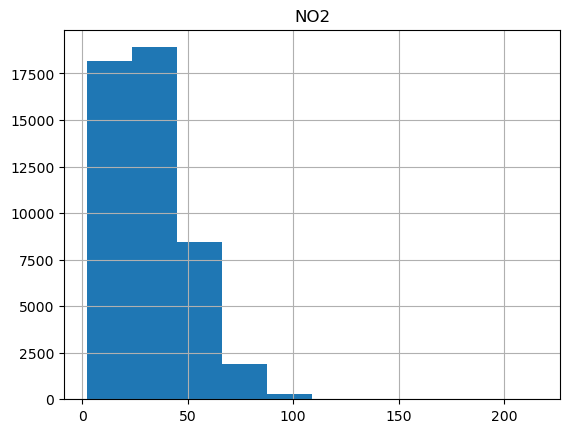

In [11]:
df.hist(column='NO2')

We can also plot two datasets alongside each other, specifying the number of bins from within the histogram. For example, in the following we specify a list of columns in our dataframe as per the general syntax:

> dataframe[[column A, column B, Column C]].plot.hist(bins=20, alpha=0.5)

where the inner square brackets represents a list. We can put this into action below, noting that since we use a single figure we have to use the same axis range. 


<AxesSubplot: ylabel='Frequency'>

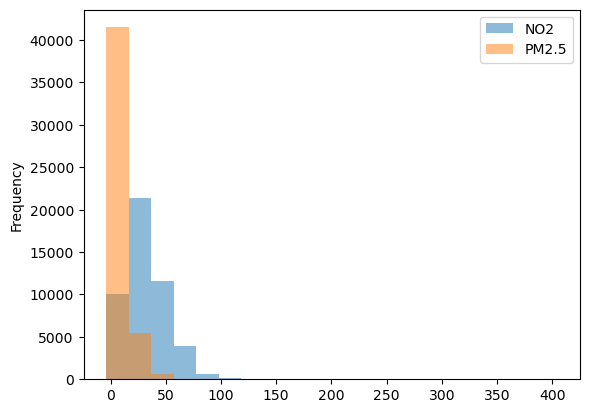

In [12]:
df[['NO2','PM2.5']].plot.hist(bins=20, alpha=0.5)

We can tweak our plots to make them easier on the eye whilst including important metrics such as standard deviations for any of the variables in our dataframe. In the following code snippet we define our own function for generating histograms of datasets alongside each other.

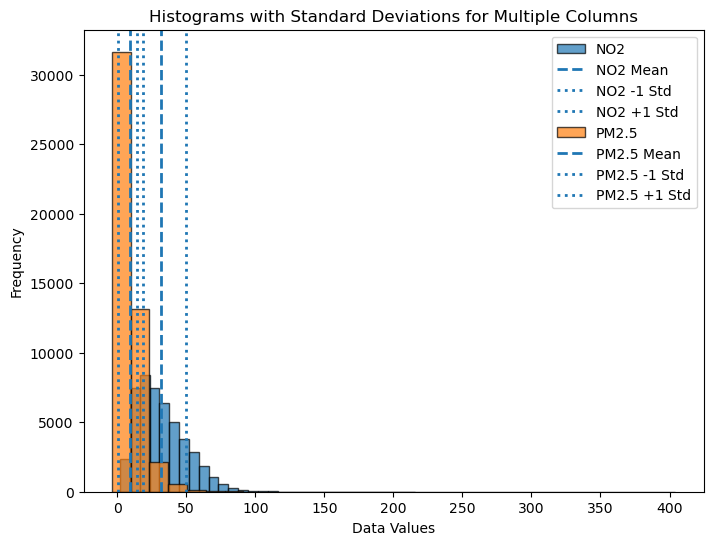

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms_with_std(df, bins=10, alpha=0.7, std_lines=True, figsize=(8, 6)):
    """
    Plots histograms with vertical lines for the standard deviations for multiple columns in a Pandas DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        bins (int, optional): The number of bins to use for the histograms. Defaults to 10.
        alpha (float, optional): The transparency of the histogram bars. Defaults to 0.7.
        std_lines (bool, optional): Whether to plot the standard deviation lines. Defaults to True.
        figsize (tuple, optional): The size of the plot. Defaults to (12, 8).
    """

    # Set the plot size
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()

    # Loop through the columns in the DataFrame
    for column in df.columns:
        # Calculate the mean and standard deviation for the current column
        mean = df[column].mean()
        std = df[column].std()

        # Plot the histogram for the current column
        plt.hist(df[column], bins=bins, alpha=alpha, edgecolor='black', label=column)

        # Plot the vertical lines for the standard deviations if required
        if std_lines:
            plt.axvline(mean, linestyle='dashed', linewidth=2, label=f'{column} Mean')
            plt.axvline(mean - std, linestyle='dotted', linewidth=2, label=f'{column} -1 Std')
            plt.axvline(mean + std, linestyle='dotted', linewidth=2, label=f'{column} +1 Std')

    # Set the labels and show the plot
    plt.xlabel('Data Values')
    plt.ylabel('Frequency')
    #ax.set_xscale('log')
    plt.title('Histograms with Standard Deviations for Multiple Columns')
    plt.legend()
    plt.show()

# Example usage:
plot_histograms_with_std(df[['NO2','PM2.5']],bins=30)


Can you see how you might modify the above to convert the axis to a log scale? Take a look at the commented line:

```

  #ax.set_xscale('log')

```

If you remove the hash symbol and run again, how does this change the figure? Can you also add two more lines to show the position of +/- 2 standard deviations?

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. A negative skew indicates that the tail on the left side of the probability density function is longer or fatter than the right side, while a positive skew indicates the tail on the right side is longer or fatter than the left side. A skewness of 0 indicates a perfectly symmetric distribution. In the code box below we use the <code? skew </code> function associated with a dataframe to generate a list of skewness values. In this example we specify a subset of the dataframe by providing the list of column names:

```

  df[['NO2','PM2.5']]

```
where <code> df </code> is the name of our dataframe and the proceeding list the columns we are interested in.

In [14]:
skewness_df = df[['NO2','PM2.5']].skew()

print(skewness_df)

NO2      0.911983
PM2.5    7.409288
dtype: float64


### 1.2) Joint plots 

A joint plot is a type of plot that combines two different types of plots to visualize the relationship between two variables. It is often used to display a scatter plot or hexbin plot in the main chart area, which shows the relationship between the two variables, along with histograms or kernel density estimates (KDE) of each variable displayed along the margins of the plot. We use histograms in this module. The marginal plots provide additional information about the individual distributions of the two variables. We dont need to define our own function, we can use another plotting module to do this for us.

We can use another dedicated package for a range of plots linked to our dataframe. Another popular plotting module used with Pandas is [Seaborn](https://seaborn.pydata.org):

>>> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

We will use this again in the second notebook. Check out the code snippet below. Ww use Seaborn to produce a jointplot, which provides a combination of histograms and a scatter plot to visualise the relationship between two variables.

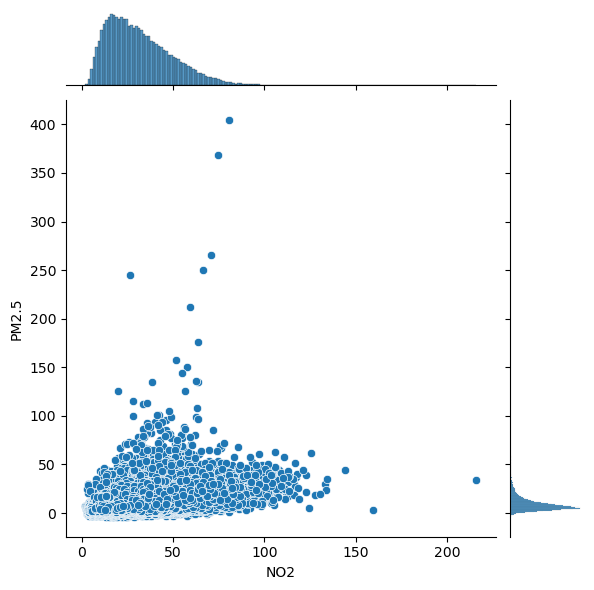

In [15]:
import seaborn as sns
sns.jointplot(data=df, x="NO2", y="PM2.5")

This is a little more insightful. We can see that both distributions are skewed, and there are a number of outliers. We can also change the axes to use a log scale as per the following code snippet. By adding the command <code> kind="reg" </code> we can also add a linear regression line between the variables to aid interpretation of any linear relationships. We can also further tweak our plot to try and improve visualisation of any underlying relationships. In this case you will see we pass a <code> joint_kws </code> argument. This contains a dictionary of keywords that define the figure properties; in this case a metric <code> alpha </code> that dictates the transparency of the symbols. You may find this can take a minute or so to complete. 

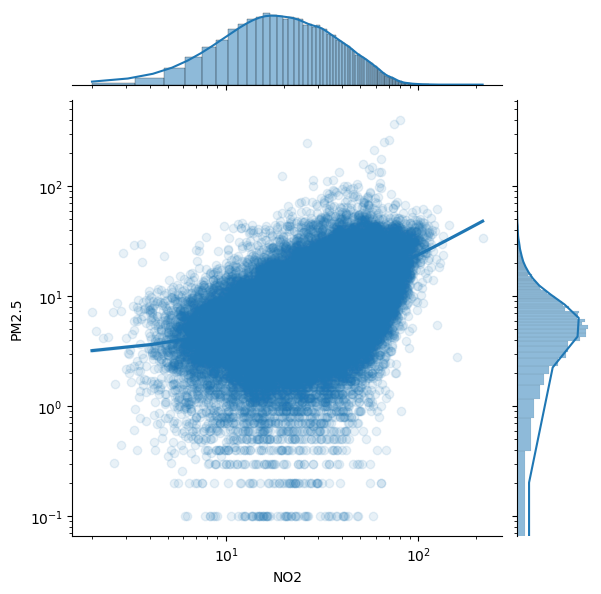

In [16]:
fig = sns.jointplot(data=df, x="NO2", y="PM2.5", kind="reg", joint_kws = {'scatter_kws':dict(alpha=0.1)})
fig.ax_joint.set_xscale('log')
fig.ax_joint.set_yscale('log')

<div class="alert alert-block alert-success">
<b> Exercise 1: Generate three joint plots of temperature and PM2.5, NO2 and O3 at the Piccadilly AURN station <a name="Exercise1"></a>  </b> 
    
    
Extend the above procedure to generate a set of joint plots between pollutants and temperature at Piccadilly. Try to decide what the relevant scale would be for each comparison. Are any underlying relationships obvious?
    
</div>

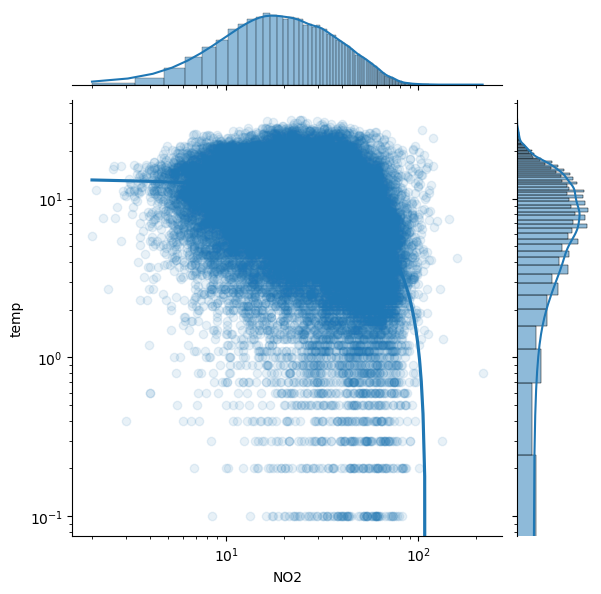

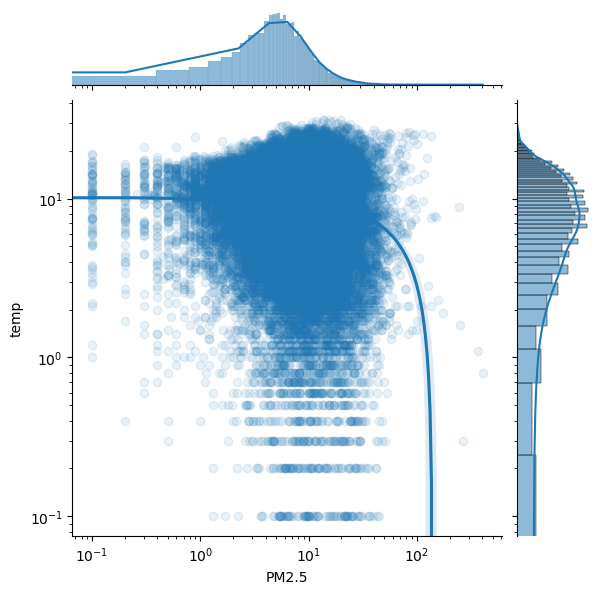

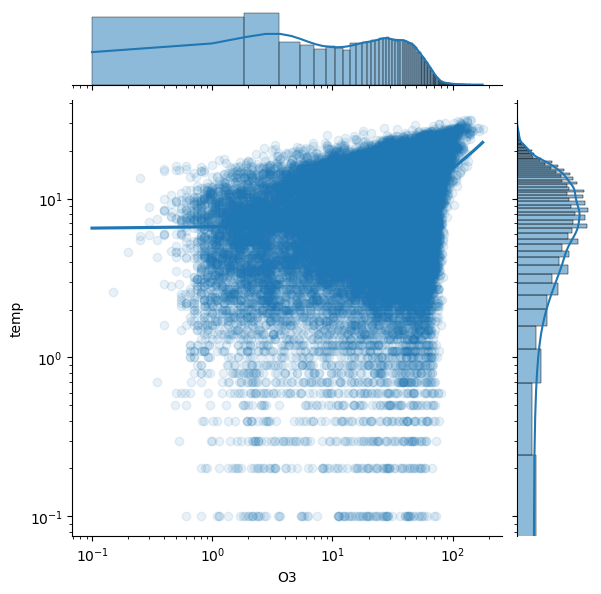

In [17]:
# ----------- INSERT CODE HERE -------------
fig1 = sns.jointplot(data=df, x="NO2", y="temp", kind="reg", joint_kws = {'scatter_kws':dict(alpha=0.1)})
fig1.ax_joint.set_xscale('log')
fig1.ax_joint.set_yscale('log')

fig2 = sns.jointplot(data=df, x="PM2.5", y="temp", kind="reg", joint_kws = {'scatter_kws':dict(alpha=0.1)})
fig2.ax_joint.set_xscale('log')
fig2.ax_joint.set_yscale('log')

fig3 = sns.jointplot(data=df, x="O3", y="temp", kind="reg", joint_kws = {'scatter_kws':dict(alpha=0.1)})
fig3.ax_joint.set_xscale('log')
fig3.ax_joint.set_yscale('log')
# ---------------------------- -------------



# 2) Merging two dataframes: Using a common time index <a name="Part2"></a>

Quite often, we do not have all the data we need in one place. You can spend a long time trying to merge datasets and then perform analysis on it. In the following we are going to load two files into two seperate dataframes before merging into one. Once we have the data in one frame, we can perform some correlation analysis on it. 

Let us recap what happens when we load a file into a dataframe. 

When we load our data into a frame, Pandas indexes each row...so we can access the data from it. You can see this index given on the left hand side in a preview of the frame via <code> .head() </code>. The problem we have is that, for correlation analysis, we want to make sure all of our data points are on a common index. In this case, we want to make sure we have our measurements on a common time base. As always, there is a Python function for that.  If you notice, our previously loaded dataframe has a column with a date/time stamp labelled as <code> date </code>. If we make that column our dataframe index, and then merge two dataframes onto this common index, we are in business. 

We have already loaded the air quality data, but let us now load in reanalysis meterological. Again, once we load this in we will preview our dataframe using the <code> .head() </code> function.

In [20]:
#load in boundary layer height, temperature at 2m etc from ECMWF re-analysis data
bl_df=pd.read_csv(path+'/data/Reanalysis/Picc_ECMWF_data_new.csv')
bl_df.head()

,time,time.1,RH,blh,blh2,u10,v10,sp,t2m,blh_final
0,2016-01-01 00:00:00,2016-01-01 00:00:00,0.872908,363.461300,363.461300,3.316313,0.828360,101122.09,277.12960,363.461300
1,2016-01-01 01:00:00,2016-01-01 01:00:00,0.897579,207.266300,207.266300,2.312755,0.475113,101201.88,276.46075,207.266300
2,2016-01-01 02:00:00,2016-01-01 02:00:00,0.928278,89.490360,89.490360,1.500882,0.974193,101252.36,275.37256,89.490360
3,2016-01-01 03:00:00,2016-01-01 03:00:00,0.950256,51.106810,51.106810,0.780747,1.406278,101316.66,274.31390,51.106810
4,2016-01-01 04:00:00,2016-01-01 04:00:00,0.967621,43.905396,43.905396,0.477687,1.641776,101351.76,274.15207,43.905396


and we can check the data types fo each column

In [21]:
bl_df.dtypes

time          object
time.1        object
RH           float64
blh          float64
blh2         float64
u10          float64
v10          float64
sp           float64
t2m          float64
blh_final    float64
dtype: object

## 2.1) Implementing the datetime format

As already noted, we have a column that has information on the time each observation was made. When we interrogate the original data type we are told the <code> date </code> column has the type <code> object </code>. The details are not important here but essentially this is telling us that we have variable string lengths in an array here. We know however this provides us with date and time.

The provenance and details of the datetime format are [long and convoluted](https://docs.python.org/3/library/datetime.html), but the important thing to note here is that once we convert strings to the datetime format, we can ask Pandas to extract powerful information like hourly averages or diurnal profiles without having to get our hands dirty with Numpy or similar.

First we need to convert the current data type. We can use the internal Pandas function:

```python
pandas.to_datetime()
```
In the following two code boxes we convert the <code> date </code> column in both dataframes to datetime and then print the new list of data types. You may find this takes a few seconds.



In [22]:
# Convert this date string to datetime format
bl_df['datetime'] = pd.to_datetime(bl_df['time'])
bl_df.dtypes

time                 object
time.1               object
RH                  float64
blh                 float64
blh2                float64
u10                 float64
v10                 float64
sp                  float64
t2m                 float64
blh_final           float64
datetime     datetime64[ns]
dtype: object

Can you see the <code> datetime64[ns] </code> result? Now let us move on with merging dataframes. 

We want to merge both and make sure data on have data at the same point in time. Can you see an issue we have with both of our dataframes? The time stamp does not start at the same point. Fortunately, there is another Pandas function that can do this for us. The function is 

```python
.merge
```
We [.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) two dataframes using a common index. In this case we want to merge values based on the column 'datetime'. We are going to create a new dataframe by merging both air quality and reanalysis data according the the index of both dataframes. 

But, can you see something that might be a problem? Each data frame uses the row number as index so we also need to change this to 'date' or 'datetime. Thus we have two operations to perform:

1. Set the **index** of both dataframes to be the same
2. Merge both dataframes into one using this new index.

For the first point, we can do that for each dataframe by using the command 

```python
.set_index('utc_time')
```

So, for example, when we run the following command do you see the index has changed?:

In [23]:
# Set the index
bl_df=bl_df.set_index('datetime')
bl_df

,time,time.1,RH,blh,blh2,u10,v10,sp,t2m,blh_final
datetime,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,0.872908,363.461300,363.461300,3.316313,0.828360,101122.09,277.12960,363.461300
2016-01-01 01:00:00,2016-01-01 01:00:00,2016-01-01 01:00:00,0.897579,207.266300,207.266300,2.312755,0.475113,101201.88,276.46075,207.266300
2016-01-01 02:00:00,2016-01-01 02:00:00,2016-01-01 02:00:00,0.928278,89.490360,89.490360,1.500882,0.974193,101252.36,275.37256,89.490360
2016-01-01 03:00:00,2016-01-01 03:00:00,2016-01-01 03:00:00,0.950256,51.106810,51.106810,0.780747,1.406278,101316.66,274.31390,51.106810
2016-01-01 04:00:00,2016-01-01 04:00:00,2016-01-01 04:00:00,0.967621,43.905396,43.905396,0.477687,1.641776,101351.76,274.15207,43.905396
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,2022-12-31 19:00:00,0.882184,1173.605800,1173.605800,4.951200,6.738736,99123.73,285.82550,1173.605800
2022-12-31 20:00:00,2022-12-31 20:00:00,2022-12-31 20:00:00,0.875025,1461.383500,1461.383500,6.095071,7.559307,99237.84,285.87793,1461.383500
2022-12-31 21:00:00,2022-12-31 21:00:00,2022-12-31 21:00:00,0.897827,1546.928000,1546.928000,6.708767,7.470122,99310.80,285.77240,1546.928000


Likewise, what happens when we set the air quality data frame index to 'utc_time'? 

In [24]:
df['datetime'] = pd.to_datetime(df['date'])
df=df.set_index('datetime')
df.head()

,date,O3,NO,NO2,NOXasNO2,SO2,PM2.5,NV2.5,V2.5,wd,...,temp,AT2.5,AP2.5,site,code,latitude,longitude,PM10,Ox,NOx
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,32.26382,3.54940,28.96035,34.40269,1.51405,15.1,13.5,1.6,223.0,...,7.8,8.1,1003.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,61.22417,32.50975
2017-01-01 01:00:00,2017-01-01 01:00:00,22.55141,5.82822,42.66724,51.60371,1.42536,5.0,2.7,2.3,227.3,...,7.5,7.7,1002.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,65.21865,48.49546
2017-01-01 02:00:00,2017-01-01 02:00:00,30.08518,3.12230,30.79077,35.57824,1.00249,4.4,1.9,2.5,246.5,...,7.4,7.6,1001.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,60.87595,33.91307
2017-01-01 03:00:00,2017-01-01 03:00:00,26.79227,2.39918,30.33751,34.01620,1.06902,3.2,2.2,1.0,353.0,...,7.2,7.8,1000.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,57.12978,32.73669
2017-01-01 04:00:00,2017-01-01 04:00:00,24.49722,1.97167,27.91915,30.94234,1.20273,3.9,3.9,0.0,28.6,...,6.4,7.5,1000.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,52.41637,29.89082


So each dataframe now uses the same index. We can now combine them into a new dataframe using the following function:
    
```python
pd.merge(dataframe1,dataframe2)
```
    
Please check the code snippet below. Notice how we can access additional time measures now that the index is in datetime format; specifically <code> .index.hour </code> to derive the hour of the day for example. We are going to use this to extract a subset of data from our dataframe using conditional statements. 

In [25]:
# Create a new data frame by merging the other two using the time index as the pivot 
combined_df=pd.merge(df[['NO2', 'NO', 'PM2.5', 'Ox', 'NOx','temp', 'ws', 'wd']],bl_df[['t2m','u10','v10','blh_final','sp','RH']], how='inner', left_index=True, right_index=True)
# Re-record time metrics in the new data frame
combined_df['hour']=combined_df.index.hour
combined_df['day']=combined_df.index.weekday
combined_df['month']=combined_df.index.month
combined_df['year']=combined_df.index.year
combined_df['day_of_year']=combined_df.index.day_of_year
combined_df.head()

,NO2,NO,PM2.5,Ox,NOx,temp,ws,wd,t2m,u10,v10,blh_final,sp,RH,hour,day,month,year,day_of_year
datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,28.96035,3.54940,15.1,61.22417,32.50975,7.8,4.5,223.0,279.50064,2.443758,2.924213,445.04938,101463.320,0.928495,0,6,1,2017,1
2017-01-01 01:00:00,42.66724,5.82822,5.0,65.21865,48.49546,7.5,4.2,227.3,279.22998,2.332650,3.196304,462.18268,101348.160,0.928607,1,6,1,2017,1
2017-01-01 02:00:00,30.79077,3.12230,4.4,60.87595,33.91307,7.4,2.7,246.5,278.56464,2.213651,3.480007,457.56848,101247.140,0.939088,2,6,1,2017,1
2017-01-01 03:00:00,30.33751,2.39918,3.2,57.12978,32.73669,7.2,3.1,353.0,278.51688,1.790367,3.617465,411.56964,101152.540,0.932534,3,6,1,2017,1
2017-01-01 04:00:00,27.91915,1.97167,3.9,52.41637,29.89082,6.4,3.9,28.6,278.46472,1.589300,3.760885,401.37550,101014.664,0.934428,4,6,1,2017,1


## 2.2) Selecting a subset of data according to some criteria 

We will always want to select data from a specific period, or when a certain condition is met. We do this using conditional statements within our dataframe. Conditional statements allow us to develop software that can be responsive to certain conditions. For example, in the following control flow diagram we define a set of instructions that initiate a variable and start a loop that adds 3 to this variable at each iteration. However, at each iteration we also check the value of said variable and if it becomes equals or greater than 30, we stop the program.

![title <](images/if_example.png)

The following table lists the Python equivalent of common mathematical symbols to check numerical values.

| Meaning | Math Symbol | Python Symbols |
| --- | --- | --- |
| Less than	 | < | < | 
| Greater than	 | > | > | 
| Less than or equal | ≤ | <= | 
| Greater than or equal | ≥ | >= | 
| Equals | = | == | 
| Not equal | ≠ | != | 

<div class="alert alert-block alert-danger">
<b> Warning </b> The obvious choice for equals, a single equal sign, is not used to check for equality. It is a common error to use only one equal sign when you mean to test for equality, and not make an assignment!
</div>

In the following code we create another dataframe that only holds data from the year 2018.

In [26]:
temporary_df = df[df.index.year == 2018]
temporary_df.head()

,date,O3,NO,NO2,NOXasNO2,SO2,PM2.5,NV2.5,V2.5,wd,...,temp,AT2.5,AP2.5,site,code,latitude,longitude,PM10,Ox,NOx
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,2018-01-01 01:00:00,39.24877,2.83514,25.35174,29.69889,4.12421,5.1,4.6,0.5,222.4,...,3.4,4.4,989.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,64.60051,28.18688
2018-01-01 02:00:00,2018-01-01 02:00:00,48.34583,1.51883,18.03759,20.36643,3.29060,1.5,0.8,0.7,223.9,...,3.4,4.4,989.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,66.38342,19.55642
2018-01-01 03:00:00,2018-01-01 03:00:00,43.30669,1.55258,23.24502,25.62561,3.75128,1.1,1.9,-0.8,225.9,...,3.3,5.1,989.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,66.55171,24.79760
2018-01-01 04:00:00,2018-01-01 04:00:00,43.25680,1.14756,23.04107,24.80064,3.22479,0.2,1.4,-1.2,230.3,...,3.4,5.2,989.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,66.29787,24.18863
2018-01-01 05:00:00,2018-01-01 05:00:00,48.64519,1.31632,19.01839,21.03672,3.15897,0.8,1.5,-0.7,230.0,...,3.4,5.5,989.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,67.66358,20.33471


Alternatively, the following code snippet generates a temporary dataframe of data only when the ambient temperature is greater than 10 and less than or equal to 20 degrees celsius.

In [27]:
temporary_df = df[(df['temp'] > 10.0) & (df['temp'] <= 20.0)]
temporary_df.head()

,date,O3,NO,NO2,NOXasNO2,SO2,PM2.5,NV2.5,V2.5,wd,...,temp,AT2.5,AP2.5,site,code,latitude,longitude,PM10,Ox,NOx
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-11 02:00:00,2017-01-11 02:00:00,44.05508,0.99379,12.27586,13.79964,2.21254,-1.3,2.0,-3.3,288.6,...,10.7,10.2,990.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,56.33094,13.26965
2017-02-02 03:00:00,2017-02-02 03:00:00,33.97679,1.82137,11.04612,13.83885,0.67387,0.9,-0.3,1.2,163.7,...,10.1,11.1,992.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,45.02291,12.86749
2017-02-02 04:00:00,2017-02-02 04:00:00,33.12862,0.87966,9.41428,10.76307,0.60669,-0.1,-1.0,0.9,176.7,...,10.3,11.5,991.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,42.54290,10.29394
2017-02-02 05:00:00,2017-02-02 05:00:00,31.78152,2.85756,14.11808,18.49961,0.87544,0.8,-0.4,1.2,179.1,...,10.3,11.6,990.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,45.89960,16.97564
2017-02-02 06:00:00,2017-02-02 06:00:00,30.08518,4.55327,21.51276,28.49434,1.01048,5.3,-1.1,6.4,175.1,...,10.3,11.5,990.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,51.59794,26.06603


<div class="alert alert-block alert-success">
<b> Exercise 2: Plot time-series of PM2.5 and boundary layer height for 2019 and 2020 <a name="Exercise2"></a>  </b> 
Use the existing code template provided below to produce a set of subplots that produce a time series of data from both 2019 and 2020. The key is to generating new dataframes that hold data from each year.
</div>

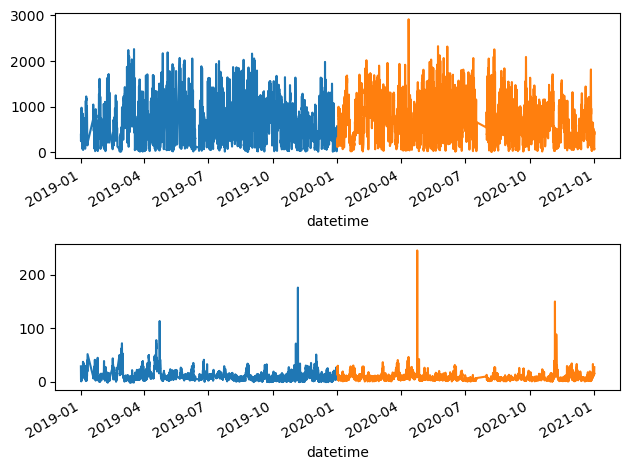

In [28]:
import matplotlib.pyplot as plt

# ---- INSERT CODE HERE ----#
df_2019 = combined_df[combined_df.index.year == 2019][['PM2.5','blh_final']]
df_2020 = combined_df[combined_df.index.year == 2020][['PM2.5','blh_final']]
# --------------------------#

fig, axs = plt.subplots(2, 1)
df_2019['blh_final'].plot(x='day_of_year',ax=axs[0])
df_2020['blh_final'].plot(x='day_of_year',ax=axs[0])

df_2019['PM2.5'].plot(x='day_of_year',ax=axs[1])
df_2020['PM2.5'].plot(x='day_of_year',ax=axs[1])

fig.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 3: Produce a histogram of PM2.5, NO2 and boundary layer height for different years <a name="Exercise3"></a>  </b> 
    
    
Now that we have seperate dataframes for 2019 and 2020, complete the code snippets below to generate jointplots between NO2, PM2.5 and boundary layer height. Can we use these graphs to infer anything with regards to drivers of concentrations?
</div>

Text(0.5, 0.98, '2020 data')

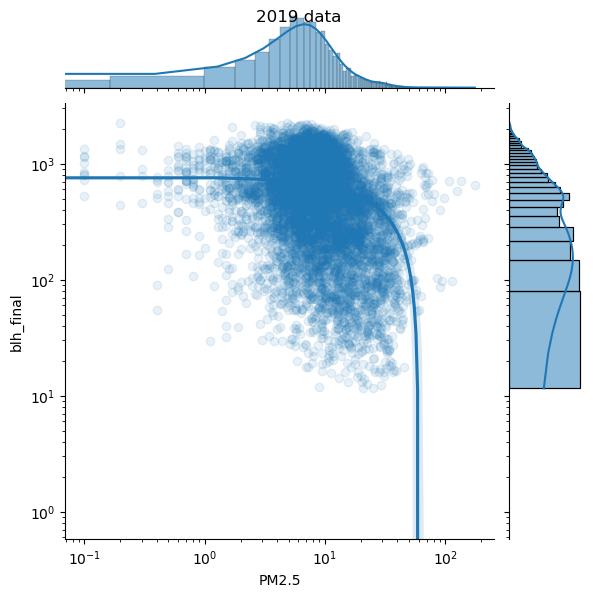

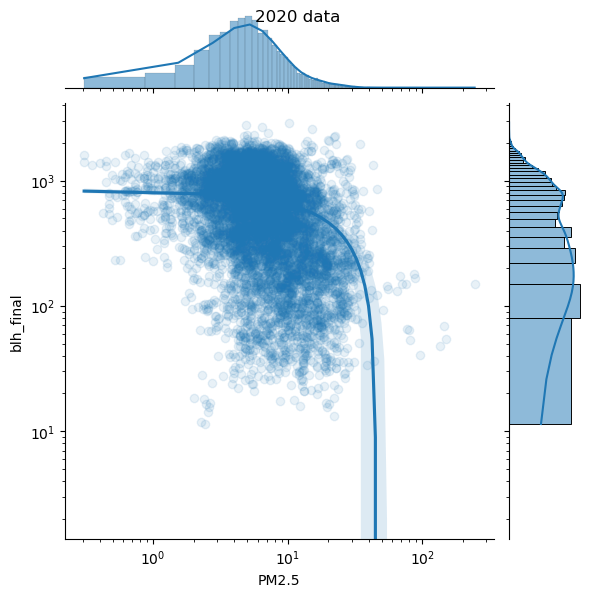

In [30]:
fig1 = sns.jointplot(data=df_2019, x="PM2.5", y="blh_final", kind="reg", joint_kws = {'scatter_kws':dict(alpha=0.1)})
fig1.ax_joint.set_xscale('log')
fig1.ax_joint.set_yscale('log')
fig1.fig.suptitle('2019 data')

fig2 = sns.jointplot(data=df_2020, x="PM2.5", y="blh_final", kind="reg", joint_kws = {'scatter_kws':dict(alpha=0.1)})
fig2.ax_joint.set_xscale('log')
fig2.ax_joint.set_yscale('log')
fig2.fig.suptitle('2020 data')

## 2.3) Resampling to daily and weekly mean values

Producing a time series plot of hourly data can look quite messy, or noisy. We could create another dataframe that contains daily or weekly averages. One way to do this could be by extracting the data, using Numpy to generate a rolling average, and then creating a new dataframe. This could be difficult and prone to errors. Now that we have mapped our dataframe on to a new index using the datetime format, we can ask Pandas to do this for us. We will use the <code> resample </code> function of the dataframe defined as follows:

>> _ [a] *Convenience method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex)..*

There are multiple options priovided by this function, covering a number of up and downsampling time indices as [detailed in the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In the following code snippet we generate a new dataframe that generates a daily average of a subset of pollutants and meterological variables. Notice when we print a preview of the dataframe to the screen we retain the time index, but each row is now seperated by a day. 


In [31]:
# Condensing the dataframes to daily averages 
combined_df_daily = combined_df[['NO2', 'PM2.5', 'temp', 'ws','t2m','u10','v10','blh_final','sp','RH']].resample('D').mean()
# Add new columns that specify a number of time indicators
combined_df_daily['day_of_year']=combined_df_daily.index.day_of_year
combined_df_daily['month']=combined_df_daily.index.month
combined_df_daily['year']=combined_df_daily.index.year
combined_df_daily.head()

,NO2,PM2.5,temp,ws,t2m,u10,v10,blh_final,sp,RH,day_of_year,month,year
datetime,,,,,,,,,,,,,
2017-01-01,19.026771,0.866667,4.262500,3.229167,278.786937,0.791894,0.150631,522.574102,100912.117042,0.942466,1,1,2017
2017-01-02,45.334331,6.775000,-0.212500,1.741667,275.069751,0.377383,-3.127617,354.752133,101845.396250,0.902817,2,1,2017
2017-01-03,38.203369,3.308333,4.729167,3.691667,274.353324,3.917307,-0.059217,371.198399,101830.907250,0.885841,3,1,2017
2017-01-04,44.854135,4.345833,2.904167,2.525000,277.544018,2.700051,-2.764450,637.201664,101582.603792,0.795231,4,1,2017
2017-01-05,86.827308,20.266667,-1.350000,1.491667,273.367093,0.155114,-1.744030,127.255627,102455.723375,0.881883,5,1,2017


Lets go back to producing a time series plot, displaying the hour values but also the daily averages across the year 2020. In the following we combine a number of steps together:

 - Create a new dataframe with hourly data, only for the year 2020
 - Create a new dataframe with daily averages, only for the year 2020
 - Create a figure with 2 subplots
 - plot PM2.5 and NO2 data to seperate axes.



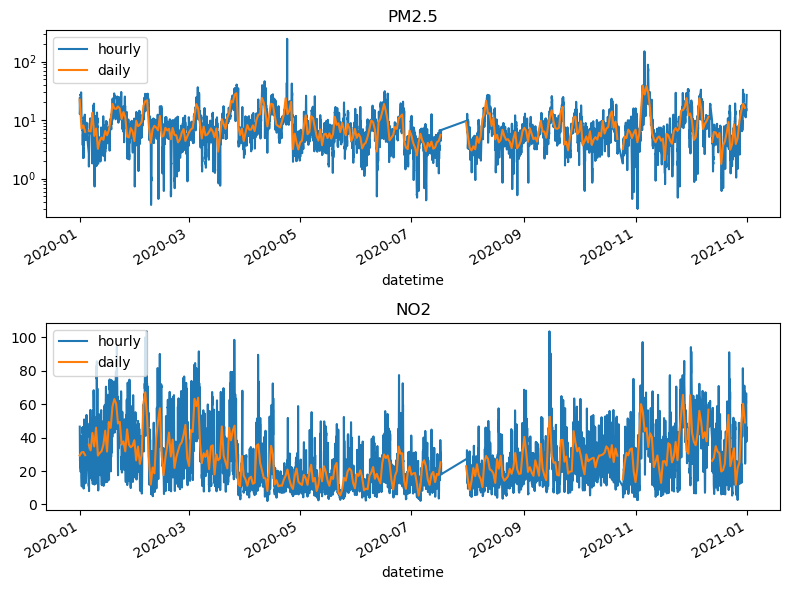

In [32]:
# Create new dataframes
df_2020_hourly = combined_df[combined_df.index.year == 2020][['PM2.5','NO2']]
df_2020_daily = combined_df_daily[combined_df_daily.index.year == 2020][['PM2.5','NO2']]
# Generate figure, axes and then populate with data on PM2.5 and NO2
fig, ax = plt.subplots(2,1,figsize=(8, 6))
df_2020_hourly['PM2.5'].plot(x='day_of_year',ax=ax[0], label="hourly")
df_2020_daily['PM2.5'].plot(x='day_of_year',ax=ax[0], label="daily")
df_2020_hourly['NO2'].plot(x='day_of_year',ax=ax[1], label="hourly")
df_2020_daily['NO2'].plot(x='day_of_year',ax=ax[1], label="daily")
ax[0].set_title('PM2.5')
ax[1].set_title('NO2')
ax[0].set_yscale('log')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
fig.tight_layout()
plt.show()



We can again generate a jointplot of daily averages as per the code snippet below. You can also see we pass yet another argument known as <code> hue </code>. This allows us to seperate the entries on the plot using a different colour that specifies different entries according to the <code> hue </code> keyword. In this case we ask the function to use a different colour for entries in a different year.

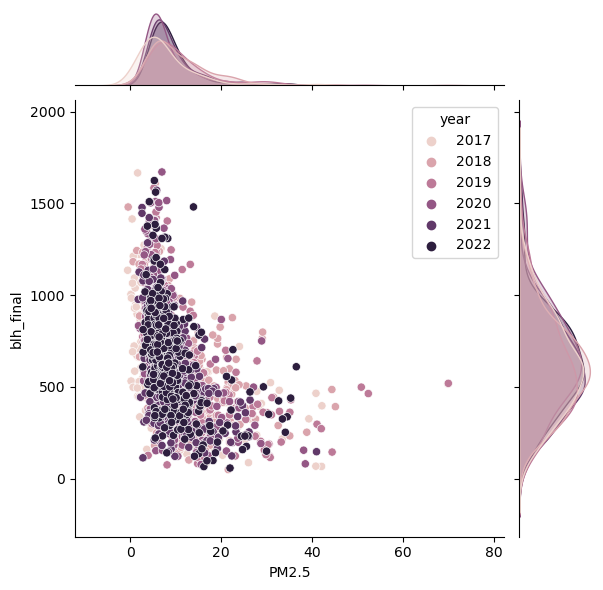

In [33]:
sns.jointplot(data=combined_df_daily, x="PM2.5", y="blh_final", hue="year")

# 3.) Generating diurnal and seasonal profiles <a name="Part3"></a>

We have thus far created a time series plot to supplement our joint plots. By setting the index of our dataframe to a datetime index, we have been able to resample to daily means, extract data by year and so on. We could 'zoom in' on a day to understand the variation of pollutant concentrations by hour, but this would only be limited to one day and we couldnt be confident that the next day would follow the same patterns. Ideally what we want would be a statistical distribution of values by hour of day across a set period. This could be over the entire data frame, or we could focus on on year as we have done above. 

Again we can rely on an existing function to do this. We will use the Seaborn boxplot functionality. What is a boxplot? A box plot, also known as a box-and-whisker plot, is a graphical representation of a dataset that displays the distribution of data based on five summary statistics: minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum. Box plots are particularly useful for identifying outliers and understanding the spread and skewness of the data.

A box plot consists of the following components:

 - 1. Box: The box represents the interquartile range (IQR), which is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile). The box's length is an indication of the spread of the data. A longer box means the data has a larger spread, while a shorter box means the data has a smaller spread.
 - 2. Median line: The median (second quartile, Q2) is represented by a line within the box. The median is the value that separates the data into two equal halves. If the median line is closer to the bottom of the box, the data is skewed to the lower side, and if it's closer to the top, the data is skewed to the upper side.
 - 3. Whiskers: The whiskers are lines that extend from the box to the minimum and maximum values within a certain range, typically 1.5 times the IQR. The whiskers represent the range of the data, excluding any potential outliers.
 - 4. Outliers: Outliers are individual data points that fall outside the whiskers. These are typically represented by small circles or other symbols.
 
The module Seaborn has a function <code> boxplot </code> which takes a dataframe as input, requiring the user to specify which variable to generate the statistics on and which variable to seperate it by. For example, in the following plots we create two subplots. On the left hand side we generate a boxplot of PM2.5 over the hour of the day, across the entire dataset. Take a look at the function syntax where we specify our 'x' and 'y' values. 


Text(0.5, 1.0, 'NO2')

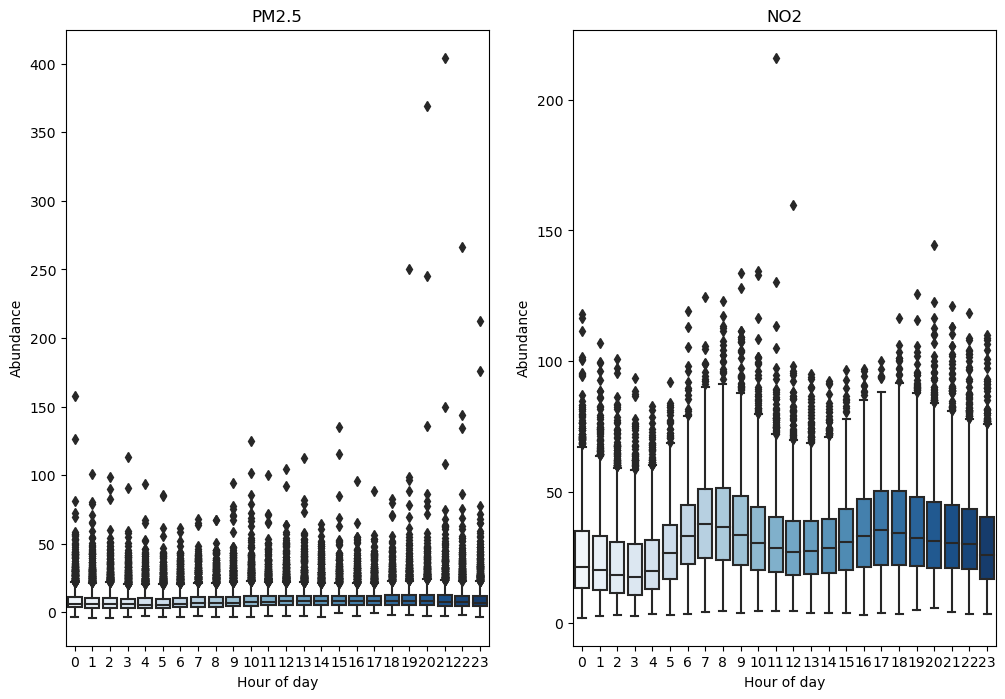

In [34]:
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['PM2.5'], ax=axes[0], palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['NO2'], ax=axes[1], palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
axes[0].set_title('PM2.5')
axes[1].set_title('NO2')


The right hand plot shows a clear diurnal signature for NO2. Why is that? For PM2.5 the graph is difficult to read. We can remove the outliers which would seemingly give us a clearer signal. In the following code snippet we specify another argument <code> showfliers=False </code> which asks the function not to show the outliers.

Text(0.5, 1.0, 'NO2')

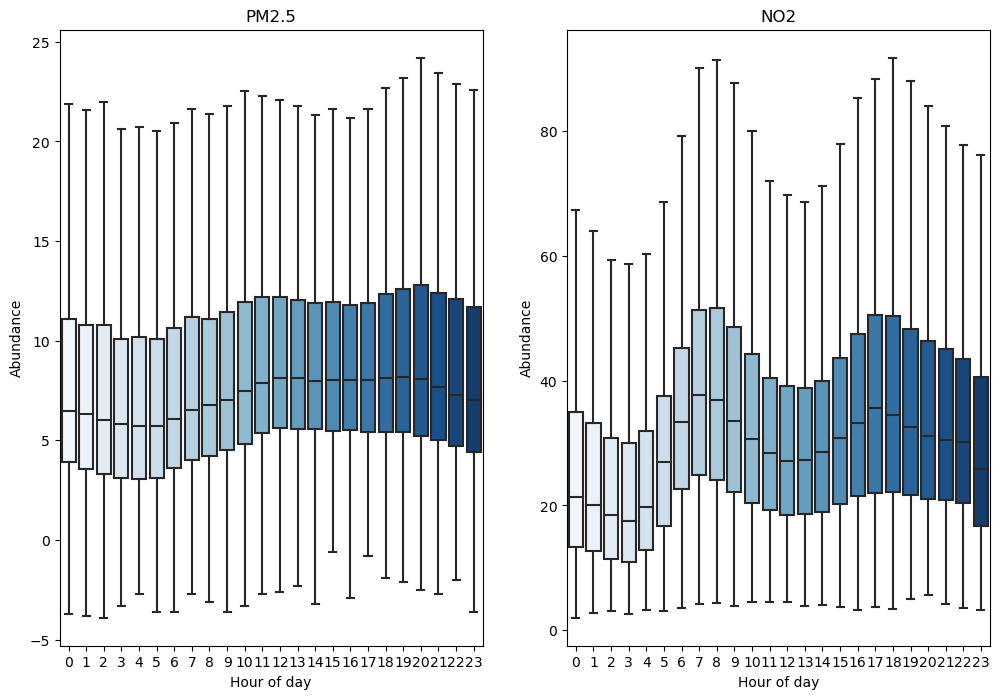

In [35]:
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['PM2.5'], ax=axes[0], showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['NO2'], ax=axes[1], showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
axes[0].set_title('PM2.5')
axes[1].set_title('NO2')

This is much easier to interpret. Interestingly, we can see a diurnal signal for the PM2.5 by the dependency on tbe hour is different. Does this perhaps relate to different sources?

We can add a number of additional argument to the Seaborn boxplot. Earlier we used a keyword <code> hue </code> in a jointplot to highlight entries from different years. Lets do the same here. This will allow us to compare profiles for different years. in the following we combine a number of steps. We again pass our combined_df, request that the function does not show outliers, but also specify the <code> hue </code> column.

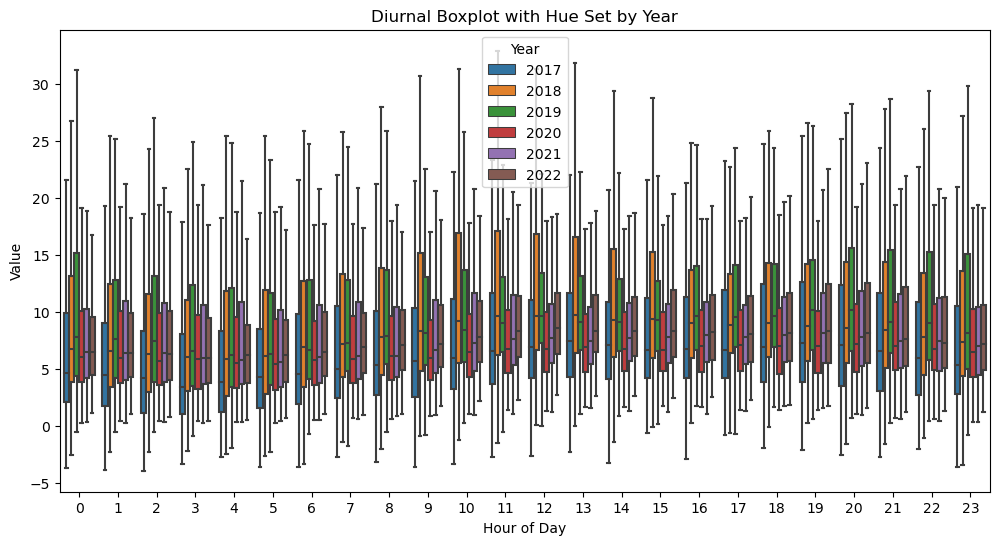

In [36]:
# Generate the diurnal boxplot with hue set by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='PM2.5', hue='year', data=combined_df, showfliers=False)
# Set the labels and show the plot
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.title('Diurnal Boxplot with Hue Set by Year')
plt.legend(title='Year')
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 4: Compare diurnal and monthly profiles of NO2 and PM2.5 in Manchester across the years 2019, 2020 and 2021 <a name="Exercise4"></a>  </b> 
    
In this exercise we are going to produce a number of boxplots to try and understand any changes in PM2.5 and NO2 before and during the pandemic in Manchester. We can use the code already provided, with two additions; 
 - we want to focus only on the years 2019, 2020 and 2021. 
 - We want to generate both diurna AND monthly profiles
    
Please complete the code template given below:

</div>

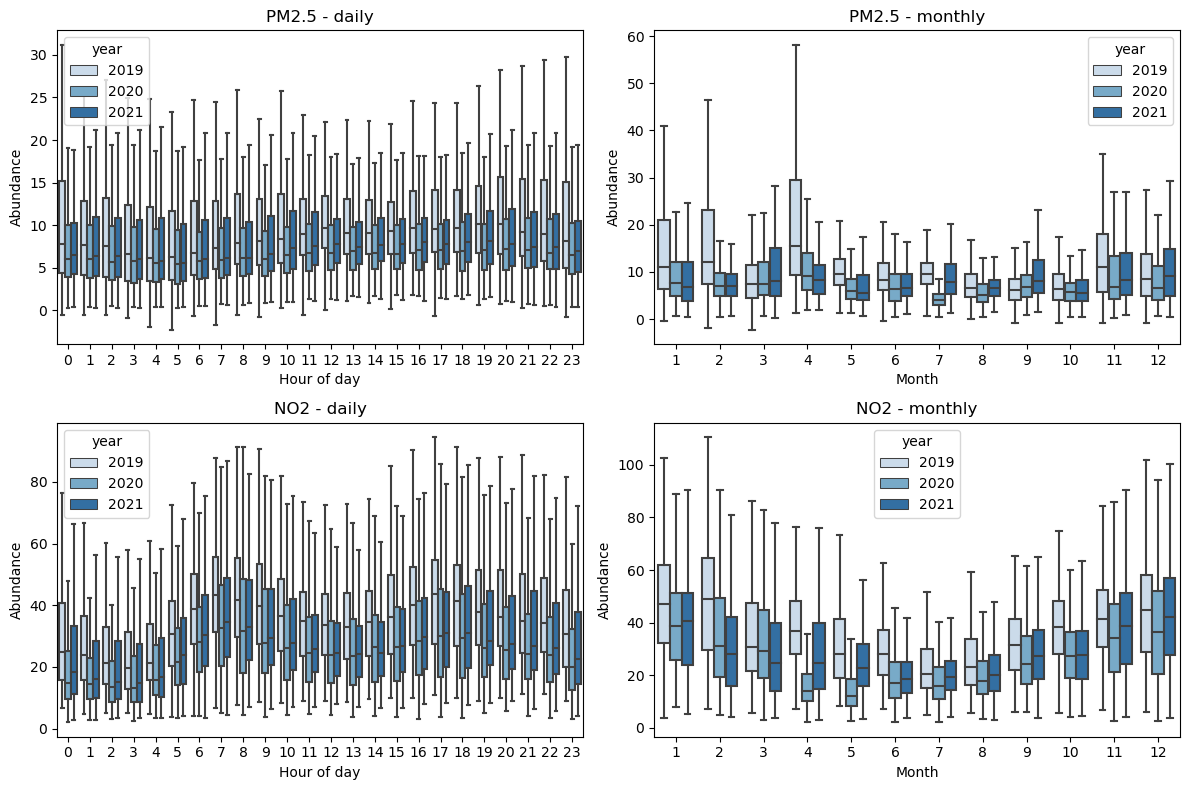

In [37]:
# Specify a new dataframe reference for only the years we are interested in
combined_df_subset = combined_df[(combined_df.index.year >= 2019) & (combined_df.index.year <=2021)]

fig, axes = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(data=combined_df_subset,x=combined_df_subset.index.hour, y=combined_df_subset['PM2.5'], ax=axes[0,0], hue='year', showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=combined_df_subset,x=combined_df_subset.index.month, y=combined_df_subset['PM2.5'], ax=axes[0,1], hue='year', showfliers=False, palette="Blues").set(xlabel='Month',ylabel='Abundance')
sns.boxplot(data=combined_df_subset,x=combined_df_subset.index.hour, y=combined_df_subset['NO2'], ax=axes[1,0], hue='year', showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=combined_df_subset,x=combined_df_subset.index.month, y=combined_df_subset['NO2'], ax=axes[1,1], hue='year', showfliers=False, palette="Blues").set(xlabel='Month',ylabel='Abundance')
axes[0,0].set_title('PM2.5 - daily')
axes[0,1].set_title('PM2.5 - monthly')
axes[1,0].set_title('NO2 - daily')
axes[1,1].set_title('NO2 - monthly')
fig.tight_layout()